In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Jay
[nltk_data]     Kanakia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jay
[nltk_data]     Kanakia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import string
import mlflow
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Jay Kanakia\Desktop\CampusX\MLOps\mlops-mini-project\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [8]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [9]:


url = 'https://raw.githubusercontent.com/campusx-official/jupyter-masterclass/main/tweet_emotions.csv'

df=pd.read_csv(url)
df.head(2)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...


In [10]:
df.drop(columns=['tweet_id'],inplace=True)

In [11]:
df = df[df['sentiment'].isin(['happiness','sadness'])]

y=df.iloc[:,:-1]
X=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
le=LabelEncoder()
y_train_le=le.fit_transform(y_train)
y_test_le=le.transform(y_test)

c:\Users\Jay Kanakia\Desktop\CampusX\MLOps\mlops-mini-project\myenv\Lib\site-packages\sklearn\preprocessing\_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jay Kanakia\Desktop\CampusX\MLOps\mlops-mini-project\myenv\Lib\site-packages\sklearn\preprocessing\_label.py:139: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [13]:
def lower_case(text:str)->str:
  text=text.lower()
  return text

# remove url

def remove_url(text:str)->str:
  pattern=re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

#remove html tag
def remove_tag(text:str)->str:
  pattern=re.compile(r'<.*?>')
  return pattern.sub(r'',text)

# remove punctuation
exclude=string.punctuation

def remove_punc(text:str)->str:
  text=[i for i in text if i not in exclude]
  return ''.join(text)

# remove stopwords
stop_words=set(stopwords.words('english'))

def remove_stop_words(text:str)->str:
  text=[i for i in text.split() if i not in stop_words]
  return ' '.join(text)

# lemmatization
ps=PorterStemmer()

def stemming(text:str)->str:
  text=[ps.stem(i) for i in text.split()]
  return ' '.join(text)

# isAlphaNum
def is_alpa_num(text:str)->str:
  text=[i for i in text.split() if i.isalnum()]
  return ' '.join(text)

def normalize_text(X_train):
  X_train=X_train.apply(lower_case)
  X_train=X_train.apply(remove_url)
  X_train=X_train.apply(remove_tag)
  X_train=X_train.apply(remove_punc)
  X_train=X_train.apply(remove_stop_words)
  X_train=X_train.apply(is_alpa_num)
  return X_train


X_train_trans=normalize_text(X_train)
X_test_trans=normalize_text(X_test)
  

Initialized MLflow to track repo "jay-kanakia/mlops-mini-project"

Repository jay-kanakia/mlops-mini-project initialized!

For LogisticRegression() accuracy_score is 0.7980722891566265
For LogisticRegression() recall_score is 0.7886792452830189
For LogisticRegression() f1_score is 0.7996174079387852
For LogisticRegression() confusion_matrix is [[820 195]
 [224 836]]
For LogisticRegression() precision_score is 0.8108632395732299
**************************************************

🏃 View run persistent-yak-992 at: https://dagshub.com/jay-kanakia/mlops-mini-project.mlflow/#/experiments/1/runs/84fcbbb9e5944673924fcc5672b7b14b
🧪 View experiment at: https://dagshub.com/jay-kanakia/mlops-mini-project.mlflow/#/experiments/1
For RandomForestClassifier() accuracy_score is 0.7628915662650603
For RandomForestClassifier() recall_score is 0.7990566037735849
For RandomForestClassifier() f1_score is 0.7749313815187557
For RandomForestClassifier() confusion_matrix is [[736 279]
 [213 847]]
For RandomForestClassifier() precision_score is 0.7522202486678508
**************************************************

🏃 View run abras

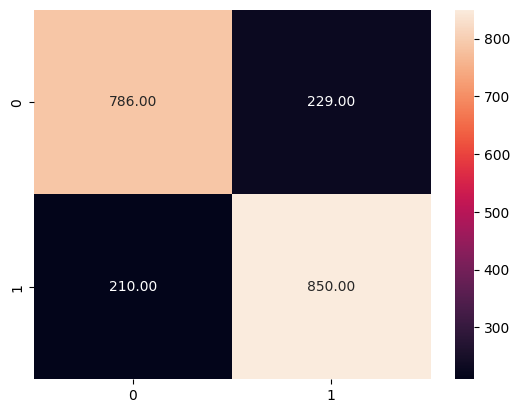

In [14]:
import dagshub
dagshub.init(repo_owner='jay-kanakia', repo_name='mlops-mini-project', mlflow=True)

mlflow.set_experiment('Baseline Model tuning')
with mlflow.start_run() as parent:
    cv=CountVectorizer()

    X_train_cv=cv.fit_transform(X_train_trans)
    X_test_cv=cv.transform(X_test_trans)

    lr=LogisticRegression()
    rfc=RandomForestClassifier()
    xgc=XGBClassifier()
    gb=GradientBoostingClassifier()
    mnb=MultinomialNB()

    models = [lr,rfc,xgc,gb,mnb]
    for model in models:
        with mlflow.start_run(nested=True) as child:
            model.fit(X_train_cv,y_train_le)
            y_pred=model.predict(X_test_cv)

            acc=accuracy_score(y_test_le,y_pred)
            recall=recall_score(y_test_le,y_pred)
            f1=f1_score(y_test_le,y_pred)
            cm=confusion_matrix(y_test_le,y_pred)
            precision=precision_score(y_test_le,y_pred)

            mlflow.log_metric('accuracy_score',acc)
            mlflow.log_metric('recall_score',recall)
            mlflow.log_metric('f1_score',f1)
            mlflow.log_metric('Precision_score',precision)


            print(f'For {model} accuracy_score is {acc}')
            print(f'For {model} recall_score is {recall}')
            print(f'For {model} f1_score is {f1}')
            print(f'For {model} confusion_matrix is {cm}')
            print(f'For {model} precision_score is {precision}')
            print('*'*50)
            print()

    train_df=pd.DataFrame(X_train)
    train_df['sentiment']=y_train

    test_df=pd.DataFrame(X_test)
    test_df['sentiment']=y_test

    train_df=mlflow.data.from_pandas(train_df)
    test_df=mlflow.data.from_pandas(test_df)

    mlflow.log_input(train_df,'training data')
    mlflow.log_input(test_df,'validation data')

    mlflow.log_artifact("baseline_exp1.ipynb")

    sns.heatmap(cm,annot=True,fmt='.2f')
    plt.savefig("cm.png")
    mlflow.log_artifact("cm.png")


    #signature=mlflow.models.infer_signature(X_train,lr.predict(X_train_cv))

    